“rút kinh nghiệm”  học lỗi sai : đó chính là gradient descent.

#**Stochastic Gradient Descent (SGD)** : học lỗi sai -> sửa mỗi lần sai (học nhanh nhưng dễ loạn)

#**Mini-Batch** : học nhóm nhỏ (ném 5 quả) học lỗi sai từ nhóm đó
#Batch : làm một lần -> mới sửa
#Batch: học xong tất cả rồi mới sửa
#Epoch: làm lại nhiều lần 1 bài (sai thì lần 2 epoch 2)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression, make_classification
!pip install pingouin

In [ ]:
X,y = make_regression(n_samples = 10000 , n_features= 1, noise =20, random_state=123)

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
rng = np.random.default_rng() #cái hộp bốc thăm ngẫu nhiên
idx = rng.permutation(5) #lắc 5 năm số bất kì [0,1,2,3,4]
idx


array([0, 2, 1, 4, 3])

default_rng() tạo bộ sinh số ngẫu nhiên.

permutation(5) trộn ngẫu nhiên các số 0 → 4.

idx là mảng chỉ số đã được xáo trộn, dùng để shuffle dữ liệu.

In [ ]:
X[idx], X[:5,0] #Lấy 5 hàng đầu tiên (0 → 4)
#trộn lại thứ tự các số trong X.

(array([[ 1.7116609 ],
        [-0.86522722],
        [-0.18938219],
        [ 0.97721845],
        [-1.58359034]]),
 array([ 1.7116609 , -0.18938219, -0.86522722, -1.58359034,  0.97721845]))

In [ ]:
rng

Generator(PCG64) at 0x7BD248BD75A0

**Trộn dữ liệu**

Không học theo thứ tự cũ

Giống như xáo bài trước khi học


**Chia dữ liệu thành nhiều nhóm nhỏ**

Mỗi nhóm gọi là mini-batch

Ví dụ: 100 câu học một lần


**Học từng nhóm**

Xem mình sai ở đâu

Sửa trí nhớ một chút

**Học đi học lại nhiều vòng**

Mỗi vòng gọi là epoch

Mỗi vòng máy giỏi hơn một chút

**Khi sai rất ít thì dừng**

Không cần học nữa

In [ ]:
def mini_batch_gd(X,y,epochs=1000,learning_rate = 0.1, batch_size=100,tol=1e-5): #Hàm này dạy máy học từng nhóm nhỏ dữ liệu

  rng = np.random.default_rng() #Trộn bài trước khi học, không học theo thứ tự cũ
  X = np.c_[np.ones((len(X), 1)), X] # Thêm 1 cột toàn số 1 vào trước X

  w = np.zeros(X.shape[1]) #Tạo trí nhớ ban đầu cho máy → chưa biết gì cả nên toàn số 0

  for epoch in range(epochs): # học hết toàn bộ bài 1 lần

    idx = rng.permutation(len(y)) #Trộn thứ tự dữ liệu
    Xs,ys = X[idx], y[idx]

    for i in range(0,len(y),batch_size):#Chia dữ liệu thành từng nhóm nhỏ (mini-batch)
      X_batch, y_batch = Xs[i:i+batch_size], ys[i:i+batch_size]  # Lấy một nắm dữ liệu nhỏ để học

      grad = -(1/len(y_batch))*(X_batch.T @ (y_batch-X_batch @ w)) #“Mình đang sai theo hướng nào và sai bao nhiêu
      w -=learning_rate * grad #Máy sửa trí nhớ của mình một chút

    if np.linalg.norm(grad) < tol: #khi nào dừng -> sai rất nhỏ
      break
  return w

In [ ]:
print(mini_batch_gd(X,y))
#size increase closer

[ 0.11276175 91.30556907]


y≈0.11+91.3×x

In [ ]:
import pingouin as pg
pg.linear_regression(X_scaled,y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.021354,0.201784,5.061628,4.230923e-07,0.953086,0.953081,0.625817,1.416891
1,x1,90.940104,0.201784,450.681078,0.000000e+00,0.953086,0.953081,90.544567,91.335640


| Thành phần | Mini-Batch GD | Pingouin (chuẩn) |
| ---------- | ------------- | ---------------- |
| Bias       | ~0.11         | ~1.02            |
| Hệ số x    | ~91.31        | ~90.94           |


pingouin là một thư viện Python dùng để làm thống kê và hồi quy một cách “chuẩn sách giáo khoa”.

Viết code cho máy học bằng mini-batch gradient descent →
dùng pingouin để đối chứng trên data nhỏ →
nếu kết quả khớp → dùng model đó cho data lớn / data khác.

#Advantages of Gradient Descent


- Large data
- Model phức tạp
- Tiết kiệm bộ nhớ
- Linh hoạt , dùng chung nhiều bài toán



In [ ]:
#Entropy suprised and get information
#High propalbility low information  (duma ko ngo se hoc)

| Khái niệm    | Ý nghĩa                      |
| ------------ | ---------------------------- |
| Surprise     | Một sự kiện hiếm thì bất ngờ |
| Uncertainty  | Mức độ không biết            |
| Entropy      | Trung bình mức bất ngờ       |
| High Entropy | Khó đoán                     |
| Low Entropy  | Dễ đoán                      |


**Entropy**= mức độ không chắc chắn (uncertainty) của một phân phối xác suất.
cao -> khó đoán  = Uncertainty

**Suprise** = 1/ Probalbility

#Tại sao phải log
- vì xác suất nhỏ thường bất ngờ => 1/P
- Bất ngờ = log(P) -> gọn hơn

#15/1/2026

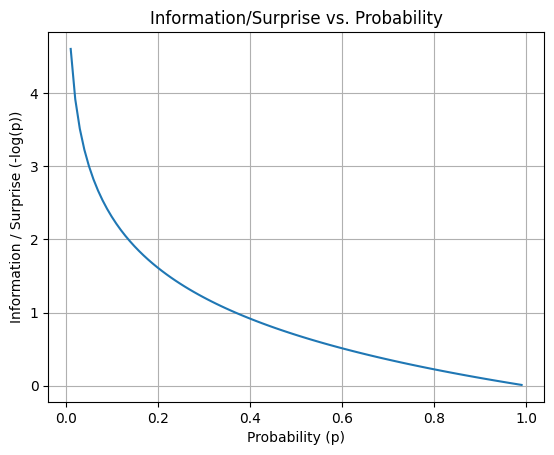

In [ ]:
prob = np.linspace(0.01, 0.99, 100) # Define a sample 'prob' array
plt.plot(prob,np.log(1/prob))
plt.xlabel('Probability (p)')
plt.ylabel('Information / Surprise (-log(p))')
plt.title('Information/Surprise vs. Probability')
plt.grid(True)
plt.show()

In [ ]:
np.log(1/prob).min(),np.log(1/prob).max()

(np.float64(0.010050335853501506), np.float64(4.605170185988092))

WHY LOG TRANSFORMATION?

In [ ]:
#cross entropy penalty of data

#CLASSIFICATION

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=123)

In [ ]:
X = X[:,0]

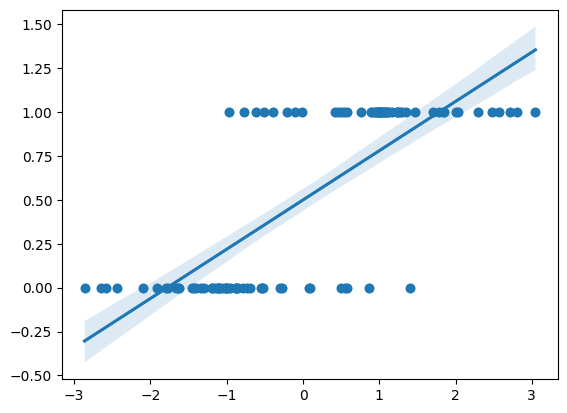

In [ ]:
plt.scatter(X,y);
sns.regplot(x=X,y=y);

In [ ]:
sigmoid = lambda x: 1/(1+np.exp(-x))

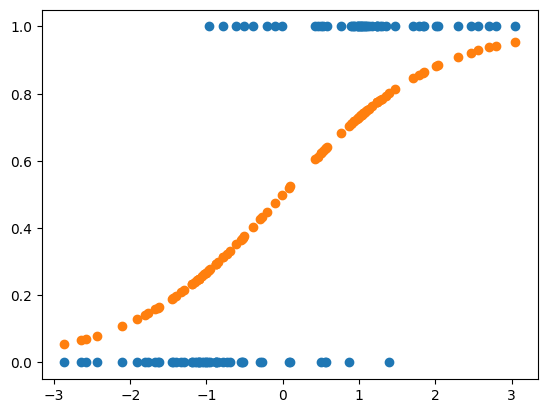

In [ ]:
plt.scatter(X,y);
plt.scatter(X,sigmoid(X));

In [ ]:
log_odds = np.log(y/(1-y))

/tmp/ipython-input-2808776892.py:1: RuntimeWarning: divide by zero encountered in divide
  log_odds = np.log(y/(1-y))
/tmp/ipython-input-2808776892.py:1: RuntimeWarning: divide by zero encountered in log
  log_odds = np.log(y/(1-y))


In [ ]:
log_odds,y

(array([ inf, -inf, -inf,  inf, -inf,  inf, -inf,  inf, -inf,  inf,  inf,
         inf, -inf, -inf, -inf,  inf,  inf,  inf, -inf,  inf, -inf,  inf,
         inf,  inf, -inf,  inf, -inf, -inf, -inf, -inf, -inf, -inf,  inf,
         inf,  inf,  inf,  inf,  inf,  inf, -inf,  inf, -inf,  inf,  inf,
         inf, -inf,  inf,  inf, -inf, -inf, -inf,  inf, -inf, -inf, -inf,
        -inf,  inf, -inf, -inf,  inf,  inf, -inf, -inf,  inf, -inf,  inf,
        -inf,  inf,  inf,  inf, -inf, -inf, -inf,  inf, -inf,  inf, -inf,
        -inf, -inf, -inf,  inf, -inf,  inf, -inf,  inf,  inf,  inf,  inf,
        -inf,  inf, -inf, -inf,  inf,  inf,  inf,  inf, -inf, -inf,  inf,
         inf]),
 array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 1,

#MAXIMUM LIKELIHOOD ESTIMATION (MLE)

Bernoulli là một mô hình xác suất dùng cho biến chỉ có 2 kết quả.
Tung 1 đồng xu → Bernoulli(0.5) = 1


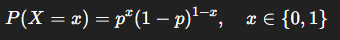



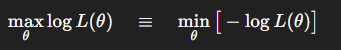

In [ ]:
from scipy.optimize import minimize
X_b = np.c_[np.ones(len(X)),X]
def neg_log_likelihood(w):
  z = X_b @ w
  p = sigmoid(z)
  return -np.sum( y * np.log(p)+(1-y)*np.log(1-p))
result = minimize(neg_log_likelihood, np.zeros(2))
weights = result.x
weights

array([0.03019764, 2.23468247])

Máy đang học cách đoán đúng nhất.

Máy thử nhiều cách đoán khác nhau

Mỗi lần đoán sai → bị trừ điểm

Máy chọn cách bị trừ điểm ít nhất

<Axes: >

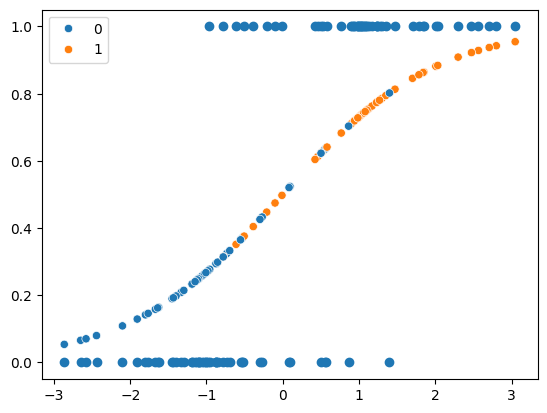

In [ ]:
plt.scatter(X,y);
sns.scatterplot(x=X, y=sigmoid(X), hue = y)

Chấm xanh (0): câu trả lời Sai

Chấm cam (1): câu trả lời Đúng

Đường cong hình chữ S: cách máy suy nghĩ

📌 Khi điểm ở bên trái → máy đoán Sai
📌 Khi điểm ở bên phải → máy đoán Đúng


Máy dùng một con số ở giữa để phân biệt ĐÚNG – SAI.

Đường cong chữ S cho ra một số từ 0 đến 1

Số này giống như độ chắc chắn

📌 Quy ước:

Nếu ≥ 0.5 → ĐÚNG (1)

Nếu < 0.5 → SAI (0)

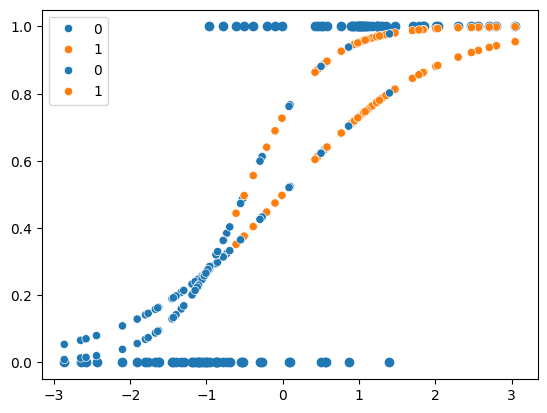

In [ ]:
plt.scatter(X,y);
sns.scatterplot(x=X, y=sigmoid(X), hue = y)
sns.scatterplot(x=X,y=sigmoid(2*X+1),hue=y);

<Axes: >

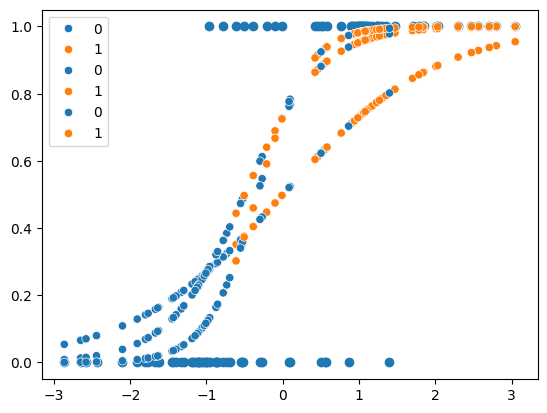

In [ ]:
plt.scatter(X,y);
sns.scatterplot(x=X, y=sigmoid(X), hue = y)
sns.scatterplot(x=X,y=sigmoid(2*X+1),hue=y);
sns.scatterplot(x=X,y=sigmoid(3*X+1),hue=y)

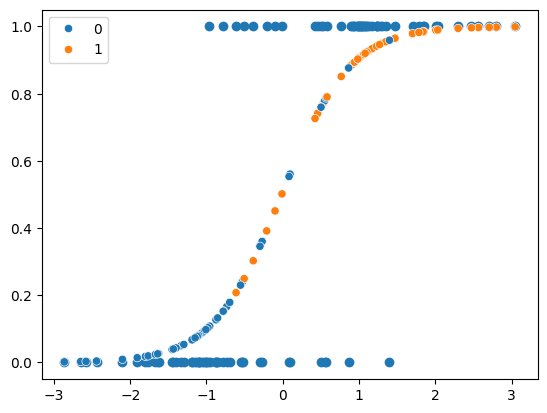

In [ ]:
plt.scatter(X,y);
sns.scatterplot(x=X,y=sigmoid(2.23468247*X +0.03019764 ),hue=y);

In [ ]:
import pingouin as pg
print(pg.logistic_regression(X,y))

       names      coef        se         z          pval  CI[2.5%]  CI[97.5%]
0  Intercept  0.030198  0.333586  0.090525  9.278704e-01 -0.623618   0.684014
1         x1  2.234676  0.396663  5.633687  1.763970e-08  1.457230   3.012121


#PHÂN BIỆT 2 PHƯƠNG THỨC

**Hai phương thức giống nhau ở đâu?**

👉 Cùng là Logistic Regression

👉 Cùng dựa trên MLE (Bernoulli + log-likelihood)

👉 Cùng học ranh giới đúng/sai

Cách bạn tự viết (minimize)
→ Tập trung vào máy học
→ Mục tiêu: tìm weight để dự đoán đúng
→ Kết quả chính: weights

pingouin.logistic_regression
→ Tập trung vào thống kê
→ Mục tiêu: phân tích & giải thích
→ Kết quả: weight + p-value + CI + odds ratio


#COST FUNCTION FOR CLASSIFICATION USING GRADIENT

CROSS-ENTROPY COST : là “điểm phạt” cho mỗi lần máy đoán sai.

- Đoán càng sai → bị phạt càng nặng

- Cross-entropy đo mức phạt đó

E = log(1/P)

  = log(1) - log(P)

  = 0 - log (P)

  = -log(p)

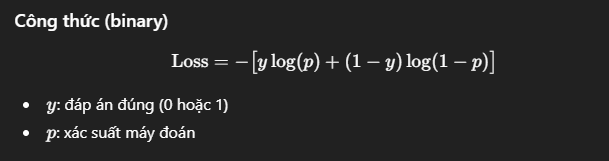

- Y = 1 -> -log(p)

- Y = 0 -> −log(1 − p)

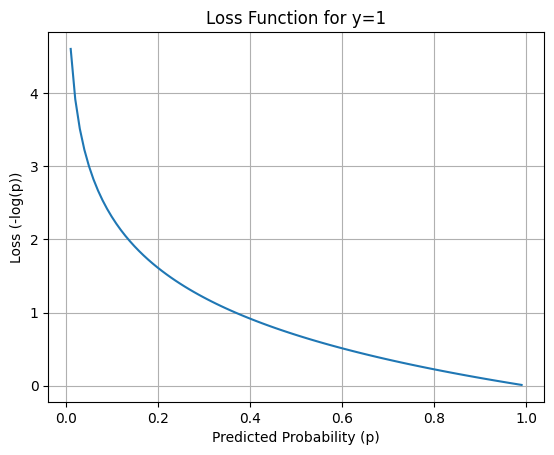

In [ ]:
y_hat = np.linspace(0.01,0.99,100)
loss = -np.log(y_hat)
plt.plot(y_hat, loss);
plt.xlabel('Predicted Probability (p)')
plt.ylabel('Loss (-log(p))')
plt.title('Loss Function for y=1')
plt.grid(True)
plt.show()

- NÓ KO LỖI (0.99) COST = 0

- CỘT TRÁI CỘT PHẠT

True y=0 and y_hat from 1....0 => - log(1-y_hat)

/tmp/ipython-input-328959986.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, -np.log(1-x));


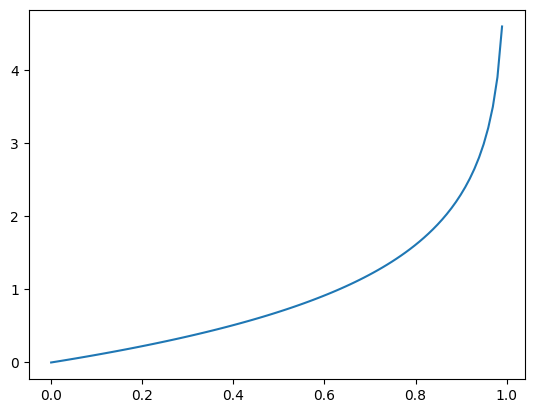

In [ ]:
x = np.linspace(0,1,100)
plt.plot(x, -np.log(1-x));
#2 values = 0
# Mà vì máy đoán p gần 1 trong khi đáp án là 0

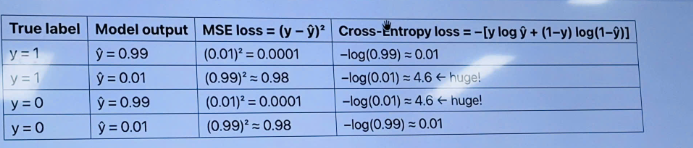

Loss large -> tu tin
sai + rất tự tin  →  sửa mạnh
sai + không chắc →  sửa nhẹ


#SIGMOID FUNCTION DERIVATIVE

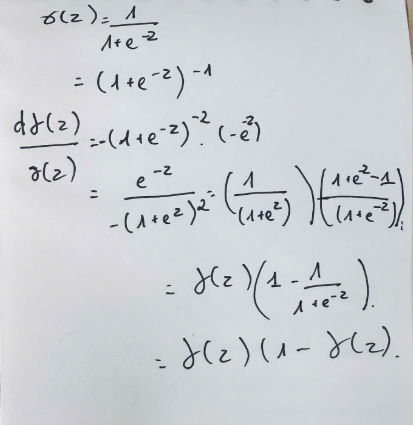

#BINARY CROSS-ENTROPY GRADIENT

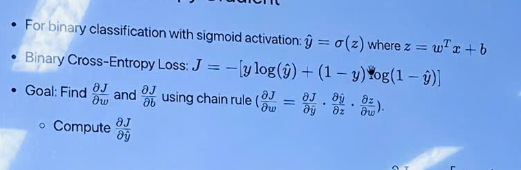

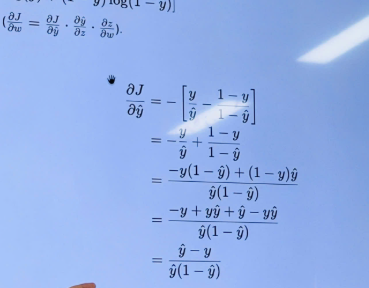
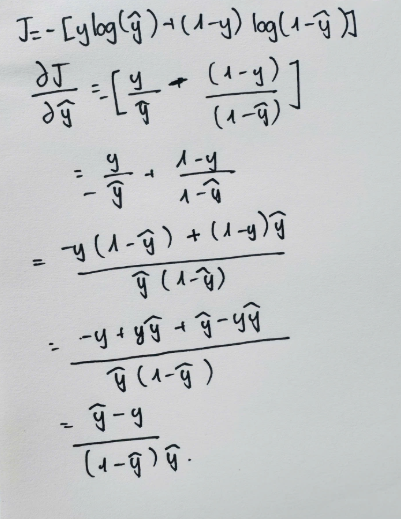

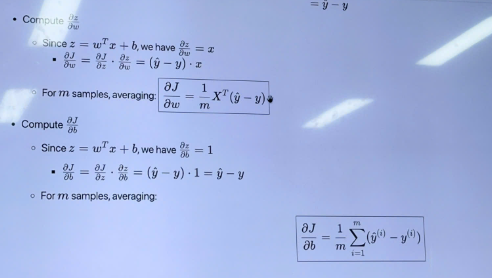

#**NPNG**


In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=23)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
sigmoid = lambda x:1/(1 + np.exp(-x))

In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression
def gradient_descent(X, y, n_iter=10000, learning_rate=0.1, tol=1e-5):

    # Add bias term
    X = np.c_[np.ones(len(X)), X]

    # Initialize weights
    w = np.zeros(X.shape[1])
    N = len(X)

    for i in range(n_iter):
        # Linear combination
        z = X @ w

        # Predicted probabilities
        p = sigmoid(z)

        # Error term (p - y)
        error = p - y

        # Gradient of Binary Cross-Entropy
        dw = (1 / N) * (X.T @ error)

        # Update weights
        w -= learning_rate * dw

        # Early stopping
        if np.linalg.norm(dw) < tol:
            print(f"Converged at iteration {i}")
            break

    return w


In [ ]:
w = gradient_descent(X_scaled, y)
print(w)


[-1.20664632 -1.84068371  5.76539299]


In [ ]:
w

array([-1.20664632, -1.84068371,  5.76539299])

In [ ]:
pg.logistic_regression(X_scaled,y)

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-1.211202,0.557557,-2.172338,0.029830,-2.303994,-0.118411
1,x1,-1.846584,0.604842,-3.053004,0.002266,-3.032052,-0.661116
2,x2,5.780476,1.324343,4.364786,0.000013,3.184811,8.376142


# thay up len moodle

can hieu sigmoid function

#**MULTICLASS LOGISTIC REGRESSION**

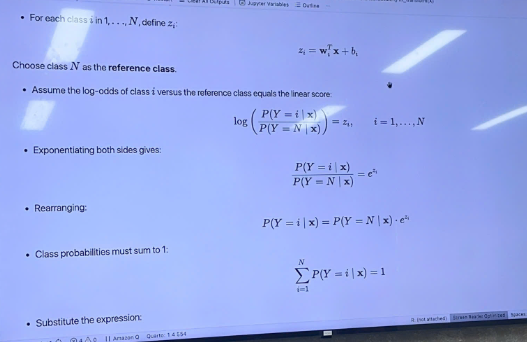

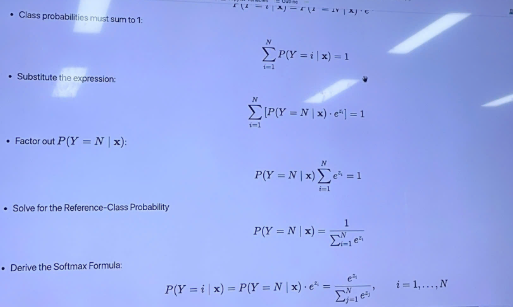

this is softmax function

#change more than 2 (probalbility not 0,1)

In [ ]:
softmax = lambda x: np.exp(x) / np.exp(x).sum()

In [ ]:
z = np.array([3.0,1.0,0.2])

In [ ]:
softmax(z)

array([0.8360188 , 0.11314284, 0.05083836])

#**Extension to multiclass classification (categorical cross - entropy)**

Nó học từ data để cho ra điểm (z), rồi dùng softmax để chuyển điểm đó thành probability.

#**SOFTWARE FUNCTION DERIVATIVE**

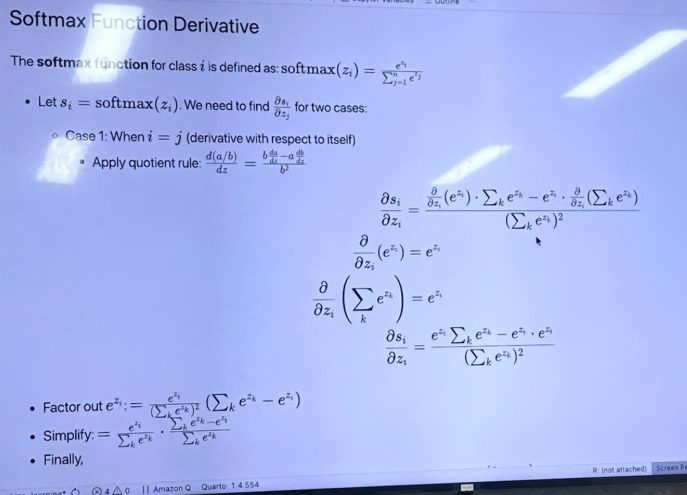

#SOFTWARE CROSS-ENTROPY GRADIENT

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=3, random_state=123)

In [ ]:
y

array([2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2,
       1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2,
       2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 1,
       2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0,
       0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2,
       0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1,
       2, 2, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0,
       1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1,
       0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,

In [ ]:
softmax = lambda z: np.exp(z) / np.sum(np.exp(x))

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

In [ ]:
y

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
import numpy as np

# Softmax function (stable)
def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Gradient Descent for Multiclass Logistic Regression
def gd_multi(X, y, n_iter=1000, tol=1e-5, learning_rate=0.1):

    # Add bias term
    X = np.c_[np.ones(len(X)), X]

    N, d = X.shape
    C = y.shape[1]      # number of classes (one-hot)

    # Initialize weights
    W = np.zeros((d, C))

    for i in range(n_iter):
        # Linear scores
        Z = X @ W

        # Predicted probabilities
        Y_pred = softmax(Z)

        # Gradient of multiclass cross-entropy
        dW = (X.T @ (Y_pred - y)) / N

        # Update
        W -= learning_rate * dW

        # Early stopping
        if np.linalg.norm(dW) < tol:
            print(f"Early stop at iteration {i}")
            break

    return W


In [ ]:
print(gd_multi(X,y))

Early stop at iteration 647
[[ 0.24649294 -0.12310339 -0.12338955]
 [ 0.05971286 -0.04752545 -0.01218741]
 [-0.02190078  0.05954032 -0.03763954]
 [ 0.02091646  0.10117629 -0.12209275]
 [ 0.17174215 -0.09597645 -0.0757657 ]
 [ 0.05447897 -0.59829606  0.54381709]
 [-0.0133549  -0.45966644  0.47302134]
 [-0.02704233 -0.00868854  0.03573087]
 [-0.04722874 -0.01302833  0.06025707]
 [ 0.13737618  0.08583827 -0.22321445]
 [-0.04239281 -0.10056552  0.14295833]]


#**ACTIVATION FUNCTIONS**

-NON linear  

1/1+e^-z  => z= 0 nen sigmoi = 0.5 doi xung hinh qua ( xem model hoat dong cua sigmoid)

tanh ~ sigmoid = model

0,1 computer remember = same idea with tannh
derive tanh = 1/ 1-tanh^2


- tanh narrow but max = 1 => better  we can move to the final destination (easily) not use because we have better (RELU)

- sigmoid = max lower 0.5

#RELU = max (0,x)


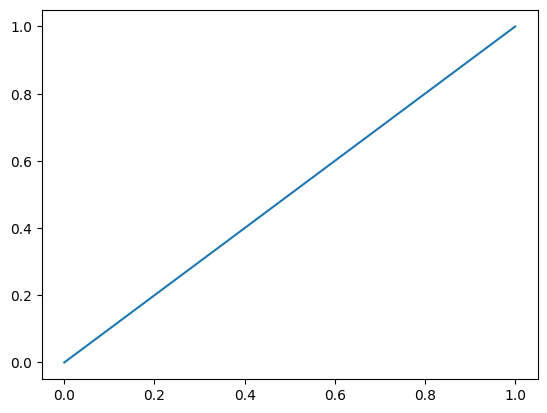

In [ ]:
relu = lambda x: np.maximum(0, x)
#less than 0 =>> 0
y_relu = relu(x)

plt.plot(x,y_relu);

Relu better for gradient descent ( major)